## K-Means and Unsupervised Learning

#### By: Kuan-Lin Chen
#### Last edited: 2021/09/01
---



In [1]:
# import packages
import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting set-up
plt.rc('font', family = 'serif', size = 13, weight = "bold")
# My Set-Up
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
# Sam's Set-Up
# plt.rc('xtick', labelsize = 10, direction = 'in', top = 'on')
# plt.rc('xtick.major', size = 5, width = 2)
# plt.rc('ytick', labelsize = 10, direction = 'in', right = 'on')
# plt.rc('ytick.major', size = 5, width = 2)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (6, 6))
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

K-Means is one of the most popular clustering algorithm widely used....

We will start with **generating some blob cluster dataset.**

In [16]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.2, 0.3, 0.11, 0.12, 0.1])

X, y = make_blobs(n_samples = 3000, centers = blob_centers,
                  cluster_std = blob_std, random_state = 89)

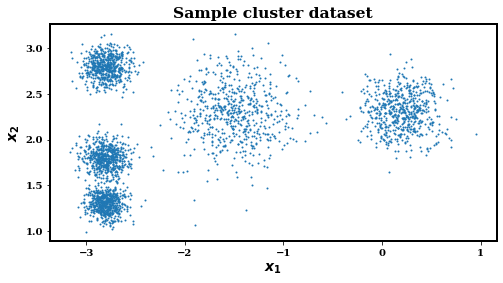

In [18]:
fig = plt.figure(figsize = (8, 4))

plt.scatter(X[:, 0], X[:, 1], s = 1)

plt.xlabel("$x_1$", fontsize = 14)
plt.ylabel("$x_2$", fontsize = 14)

plt.title("Sample cluster dataset", weight = "bold")

plt.show()

In [19]:
from sklearn.cluster import KMeans

In [20]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 